In [12]:
from keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [13]:
data = pd.read_csv('Dataset 2.csv')


data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
print(data.isnull().sum())

#print(data_full.info())
print(data.shape)

#print(data.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data.describe())
#print(data_full['class'] < 0.0)

y = data["fake"]
X = data.drop("fake", 1)

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64
(692, 12)


<ipython-input-13-4be7cf9e651f>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("fake", 1)


In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(692, 1, 11)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state = 9)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()

model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))

model.add(layers.Dense(64))
model.add(Dropout(0.3))
model.add(layers.Dense(64))
model.add(Dropout(0.3))


model.add(layers.Dense(1, activation='sigmoid'))

# FIT / TRAIN model

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_test,y_test) )

X_train:  (553, 1, 11)
X_test:  (139, 1, 11)
y_train:  (553,)
y_test:  (139,)
Epoch 1/100
18/18 [==============================] - 3s 25ms/step - loss: 0.6773 - accuracy: 0.6691 - val_loss: 0.6454 - val_accuracy: 0.8417
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6144 - accuracy: 0.7993 - val_loss: 0.5221 - val_accuracy: 0.8273
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4663 - accuracy: 0.8626 - val_loss: 0.3365 - val_accuracy: 0.9281
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.3225 - accuracy: 0.8843 - val_loss: 0.2361 - val_accuracy: 0.9281
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.8897 - val_loss: 0.2371 - val_accuracy: 0.9281
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2683 - accuracy: 0.8915 - val_loss: 0.1923 - val_accuracy: 0.9281
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.

In [15]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

5/5 [==============================] - 0s 4ms/step - loss: 0.1506 - accuracy: 0.9424
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.15058377385139465, 0.9424460530281067]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

5/5 [==============================] - 0s 4ms/step
[0.48 0.   0.34 0.05 0.07 1.   0.03 0.92 0.1  1.   1.   0.94 0.77 1.
 0.3  0.79 0.   1.   0.   0.   1.   0.   0.   1.   0.5  1.   1.   0.27
 0.   0.28 0.93 1.   1.   1.   1.   0.05 0.33 0.29 0.57 0.11 0.46 1.
 1.   1.   1.   1.   0.   0.   0.   0.   0.   0.16 1.   0.02 0.87 0.54
 0.   0.03 0.02 0.12 0.   1.   0.01 0.06 1.   0.84 1.   0.94 1.   0.78
 0.8  1.   0.04 0.49 0.35 0.   0.01 1.   0.99 1.   0.01 1.   0.39 0.49
 0.01 1.   1.   0.   0.04 0.93 1.   0.81 0.   0.81 0.05 0.48 0.04 1.
 0.08 0.23 0.   1.   0.   0.81 1.   0.   1.   1.   0.7  0.21 0.   0.44
 1.   0.05 0.16 1.   0.   0.   0.78 0.97 0.01 0.   0.12 1.   0.   1.
 1.   0.02 0.88 0.99 1.   1.   1.   0.   0.   0.   0.73 1.   0.  ]
[0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

print('F1 score: %f' % f1)


Accuracy: 0.942446
Recall: 0.953846
F1 score: 0.939394


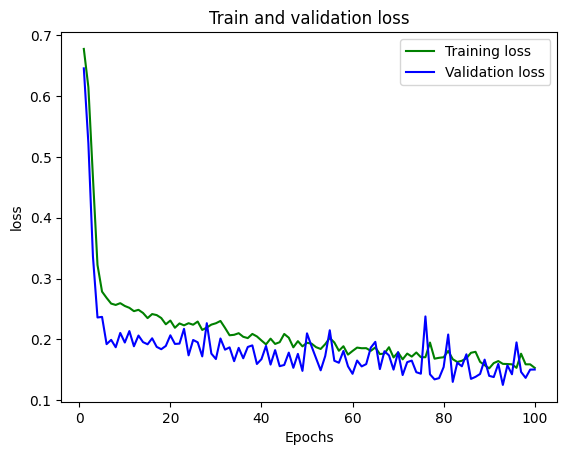

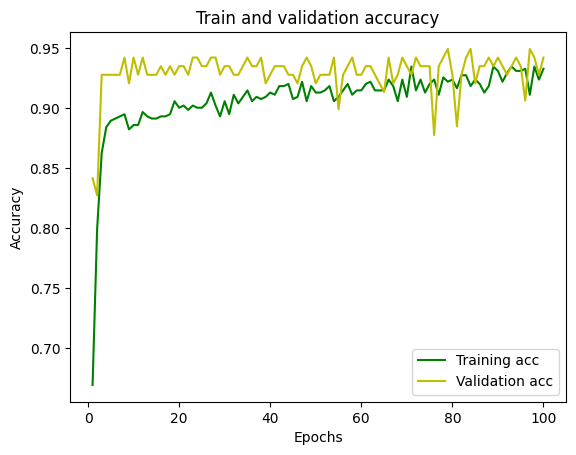

In [18]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()